In [ ]:
# Data inf0 - https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
# importing required libraires
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# deeplearning frame works
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# dimension of the target
print(y_train.ndim)
print(y_test.ndim, '\n')


#  reshaping the y_train to 1 dim
y_train_reshape = y_train.reshape(-1, )
y_test_reshape = y_test.reshape(-1, )

# reshaped new array dimension
print(y_train_reshape.ndim)
print(y_test_reshape.ndim)

2
2 

1
1


In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

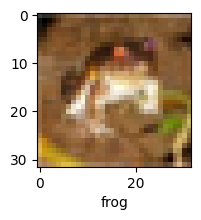

In [ ]:
# Printing the first image
plt.figure(figsize=(15, 2))
plt.imshow(x_train[0])
plt.xlabel(classes[y_train[0][0]])
plt.show()

In [ ]:
# creating a function
def sample_img(x, y):
    rdm_img = random.randint(0, len(x))
    plt.figure(figsize=(15, 2))
    plt.imshow(x[rdm_img])
    plt.xlabel(classes[y[rdm_img][0]])
    plt.show()

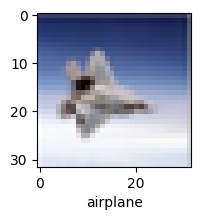

In [ ]:
# random sample from training data
sample_img(x_train, y_train)

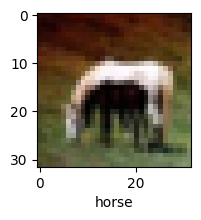

In [ ]:
# random sample from testing data
sample_img(x_test, y_test)

In [ ]:
# Normalize the data
x_train = x_train/255
x_test  = x_test/255

In [ ]:
# Model building

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Output class
# [dog, cat] - [0, 1] - binary classification - binary_crossentropy
# [dog, cat, duck] - [0, 0, 1] - categorical_crossentropy
# [dog, cat, duck] - [0, 1, 2] - sparse_categorical_crossentropy

# model compilation
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fitting the data into the model
model.fit(x_train, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3566 - loss: 1.7567 - val_accuracy: 0.5139 - val_loss: 1.3483
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5778 - loss: 1.1870 - val_accuracy: 0.6112 - val_loss: 1.1067
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6412 - loss: 1.0214 - val_accuracy: 0.6336 - val_loss: 1.0503
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6756 - loss: 0.9330 - val_accuracy: 0.6524 - val_loss: 1.0012
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7019 - loss: 0.8574 - val_accuracy: 0.6722 - val_loss: 0.9643
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7208 - loss: 0.7958 - val_accuracy: 0.6814 - val_loss: 0.9400
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7384 - loss: 0.7359 - val_accuracy: 0.6835 - val_loss: 0.9363
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7572 - loss: 0.6930 

In [ ]:
# evaluate the model
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6700 - loss: 1.3741


[1.4223214387893677, 0.6599000096321106]

In [ ]:
# prediction data
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# prediction data sample
y_pred.shape

(10000, 10)

In [ ]:
# converting the y_pred to data set
y_pred_df = pd.DataFrame(y_pred, columns=classes)
y_pred_df.head()

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,1.262494e-04,1.720829e-11,9.434627e-06,1.655219e-01,3.884474e-05,8.339528e-01,3.490268e-04,3.161128e-09,1.726142e-06,1.075245e-08
1,3.502811e-05,2.824788e-01,8.590780e-08,1.967723e-09,2.999372e-09,1.130920e-11,3.327485e-15,1.186381e-12,7.174456e-01,4.050348e-05
2,7.182324e-03,8.934033e-02,1.230067e-03,4.529398e-03,4.233703e-03,1.606175e-04,7.431077e-06,3.853055e-05,8.268889e-01,6.638871e-02
3,9.963644e-01,9.091201e-04,2.295733e-03,6.230779e-05,1.235301e-06,1.262588e-09,4.685016e-08,1.838057e-10,3.494787e-04,1.780009e-05
4,2.087645e-08,4.204388e-08,1.608788e-03,2.006344e-01,4.906107e-01,5.089490e-04,3.066371e-01,3.112008e-10,2.852834e-09,5.788595e-09


In [ ]:
# index number of the predicted class based on highest probability
y_class = [np.argmax(ele) for ele in y_pred]

In [ ]:
# sample output of y_class
y_class[:10]

[5, 8, 8, 0, 4, 6, 5, 6, 3, 1]

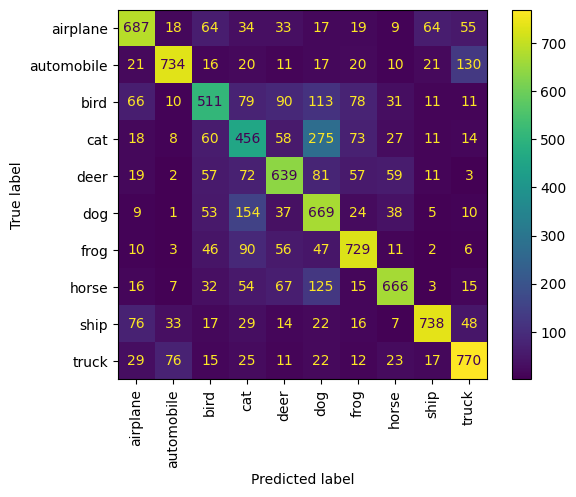

In [ ]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_class, display_labels=classes, xticks_rotation='vertical')

In [ ]:
# funtion for random prediction output
def validate_rdm_img():
    '''This function validates a random image from the test data and returns the prediction'''

    plt.figure(figsize=(15,2))
    rdm_img = random.randint(0, len(x_test))
    plt.imshow(x_test[rdm_img, :])
    plt.show()

    print('Actual Image is:', classes[y_test[rdm_img][0]])
    print('Predicted Image is:', classes[y_class[rdm_img]])
    print('Predicted Image Probability:', round(y_pred[rdm_img][y_class[rdm_img]],2))

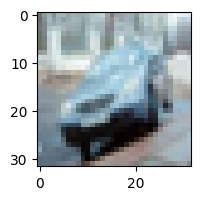

Actual Image is: automobile
Predicted Image is: automobile
Predicted Image Probability: 0.8


In [ ]:
validate_rdm_img()